# Лабораторная работа 2. Вариант 5.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
from scipy.stats import norm, gamma, expon
from statsmodels.distributions.empirical_distribution import ECDF

## Задание 1. 
Загрузить данные из файла train.csv. Подготовить данные для
дальнейшего анализа, исключив их них экстремально большие
значения.

In [4]:
df = pd.read_csv(r'train.csv')

df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


Рассмотрим описательные статистики для переменной SalePrice.

In [6]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [7]:
data = df['SalePrice']

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

data = data[data < Q3 + 1.5 * IQR]

data.describe()

count      1399.000000
mean     170237.127234
std       59230.130817
min       34900.000000
25%      129000.000000
50%      159500.000000
75%      203500.000000
max      340000.000000
Name: SalePrice, dtype: float64

## Задание 2. 

Подобрать три непрерывных распределения (минимум два должны
подходить по форме) и с помощью каждого из них приблизить
соответствующие распределения выборочных данн.

Сперва выясним форму распределения выбранных данных самым простым способом, а именно построим гистограмму распредлеения.ых

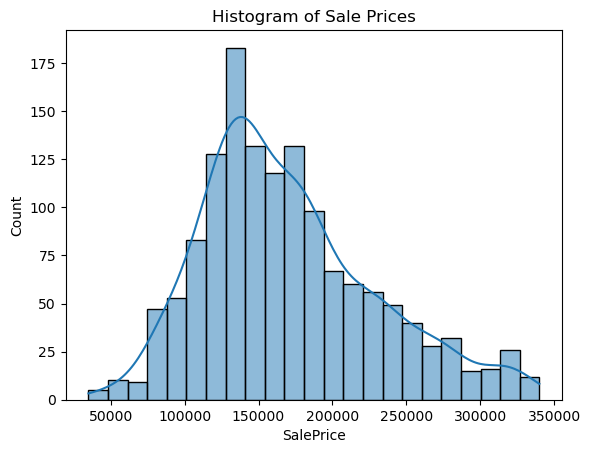

In [9]:
sns.histplot(data, kde=True)

plt.title('Histogram of Sale Prices')
plt.show()

In [132]:
a, loc, scale = gamma.fit(data)
gamma_dist = gamma.pdf(np.linspace(data.min(), data.max(), data.count()), a, loc, scale)

loc, scale = expon.fit(data)
exp_dist = expon.pdf(np.linspace(data.min(), data.max(), data.count()), loc, scale)

mu, std = norm.fit(data)
norm_dist = norm.pdf(np.linspace(data.min(), data.max(), data.count()), mu, std)

distributions={'гамма-распределение': [gamma_dist, 2, a, loc, scale], 
               'экспоненциальное распределение': [exp_dist, 1, loc, scale], 
               'нормальное распределение': [norm_dist, 2, mu, std]}

## Задание 3.
Вывести оценки параметров распределения. Построить графики.

Параметры гамма-распределение: [8.209358928447521, 34900.0, 135337.12723373837].
Параметры экспоненциальное распределение: [34900.0, 135337.12723373837].
Параметры нормальное распределение: [170237.12723373837, 59208.958294439006].


C:\Users\Morzhig\AppData\Local\Temp\ipykernel_19184\1635711752.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, hist=True, kde=True, bins=20)


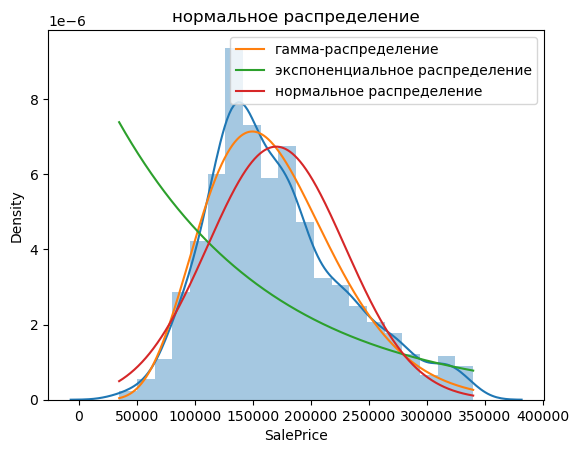

In [137]:
for key in distributions.keys():
    print(f'Параметры {key}: {distributions[key][2:]}.')
    
sns.distplot(data, hist=True, kde=True, bins=20)

for key in distributions.keys():
    plt.plot(np.linspace(data.min(), data.max(), data.count()),distributions[key][0], label=f'{key}')
    plt.xlabel('SalePrice')
    plt.ylabel('Density')
    plt.legend()
    plt.title(f'{key}')

plt.show()

## Задание 4.
Для проверки согласованности данных с распределением и выбора
лучшего приближения необходимо провести Хи-квадрат тест. Логику
работы теста реализовать самому.

In [152]:
def chi_square(data_approx, data, ddof, num_bins=20):
    data_approx_binned = np.histogram(data_approx, bins=num_bins)[0]
    data_binned = np.histogram(data, bins=num_bins)[0]

    if np.sum(data_approx_binned) != np.sum(data_binned):
        data_approx_binned = data_approx_binned * len(data) / np.sum(data_approx_binned)

    chi_2 = np.sum((data_approx_binned - data_binned)**2 / data_binned)

    df = num_bins - ddof
    p_value = 1 - scipy.stats.chi2.cdf(chi_2, df)
    
    return chi_2, p_value
    
for key in distributions.keys():
    print(f'Тест Хи-квадрат для {key}: {chi_square(distributions[key][0], data, distributions[key][1])}.')

Тест Хи-квадрат для гамма-распределение: (8091.262111726116, 0.0).
Тест Хи-квадрат для экспоненциальное распределение: (12052.932183674613, 0.0).
Тест Хи-квадрат для нормальное распределение: (7138.1007805678455, 0.0).


## Задание 5. 
Сделать вывод о качестве аппроксимации.

Исходя из полученных результатов, можно сказать, что качество аппроксимации крайне низкое.

## Задание 6. 
Сравнить результаты реализации с готовым решением.

In [156]:
for key in distributions.keys():
    dist = distributions[key][0]
    
    if np.sum(dist) != np.sum(data):
        dist = dist * np.sum(data) / np.sum(dist)

    data_approx_binned = np.histogram(dist, bins=10)[0]
    data_binned = np.histogram(data, bins=10)[0]
    
    print(f'Тест Хи-квадрат для {key}: {scipy.stats.chisquare(data_approx_binned, data_binned, ddof=10)}')

Тест Хи-квадрат для гамма-распределение: Power_divergenceResult(statistic=6358.235134665443, pvalue=nan)
Тест Хи-квадрат для экспоненциальное распределение: Power_divergenceResult(statistic=8463.744418097507, pvalue=nan)
Тест Хи-квадрат для нормальное распределение: Power_divergenceResult(statistic=5311.510105023898, pvalue=nan)
